# Lead Scoring Case Study

#### Goals of Case Study 
- To build a logistic regression model that can be used to assign a lead score between 0 and 100 to each lead.
- The lead score will be used by the company to target potential leads.
- A higher score will mean that the lead is hot, i.e. is most likely to convert.
- A lower score will mean that the lead is cold and will mostly not get converted.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [2]:
# Load the data
data = pd.read_csv("Leads.csv")

In [3]:
# Check the data 
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Check the shape of the data 
data.shape 

(9240, 37)

In [5]:
# Check the data 
data.describe() 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Checking data types of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### Check for duplicates

In [7]:
duplicate_rows = data.duplicated()
print("Duplicate Rows:")
print(data[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]


##### There are no duplicates in rows


##### Check for null values 

In [8]:
# Check for null values in the DataFrame
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Artic

### Data Preparation
##### Calculate the percentage of null values

In [9]:
# Check for null values in the DataFrame
null_values = data.isnull().sum()

# Calculate the percentage of null values
total_rows = len(data)
null_percentage = round((null_values / total_rows) * 100,2)

print("Null Value Percentage:")
print(null_percentage)

Null Value Percentage:
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                  

#### Droping coulmns greater than 50 percentage 

In [10]:
columns_to_drop = null_percentage[null_percentage > 50].index
data = data.drop(columns=columns_to_drop)

In [11]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


 Using median to fill missing values in non categorical columns 

In [12]:
columns_to_fill = ["TotalVisits", "Page Views Per Visit"]
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].median())


#### Converting some binary variables (Yes/No) to 0/1

In [13]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
            ,'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Categorical Attributes Analysis

In [14]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

### Droping non categorical coulmns with missing values greater than 45% 

In [16]:
## droping the folowing coulmns because they have missing values greater than 45%
data = data.drop(columns=["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"])

In [17]:
# Replace the missing values with the most frequent value for the missing values in categorical column 
data = data.fillna(data.mode().iloc[0])

In [18]:
# Drop the irrelevant columns
data = data.drop(["Lead Number", "Prospect ID"], axis=1)

### Univariate analysis of Country Coulmn 

In [19]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,Interested in other courses,0,0,Select,Select,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,Ringing,0,0,Select,Select,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,Will revert after reading the email,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,Ringing,0,0,Select,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,Will revert after reading the email,0,0,Select,Mumbai,0,0,Modified


In [20]:
data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

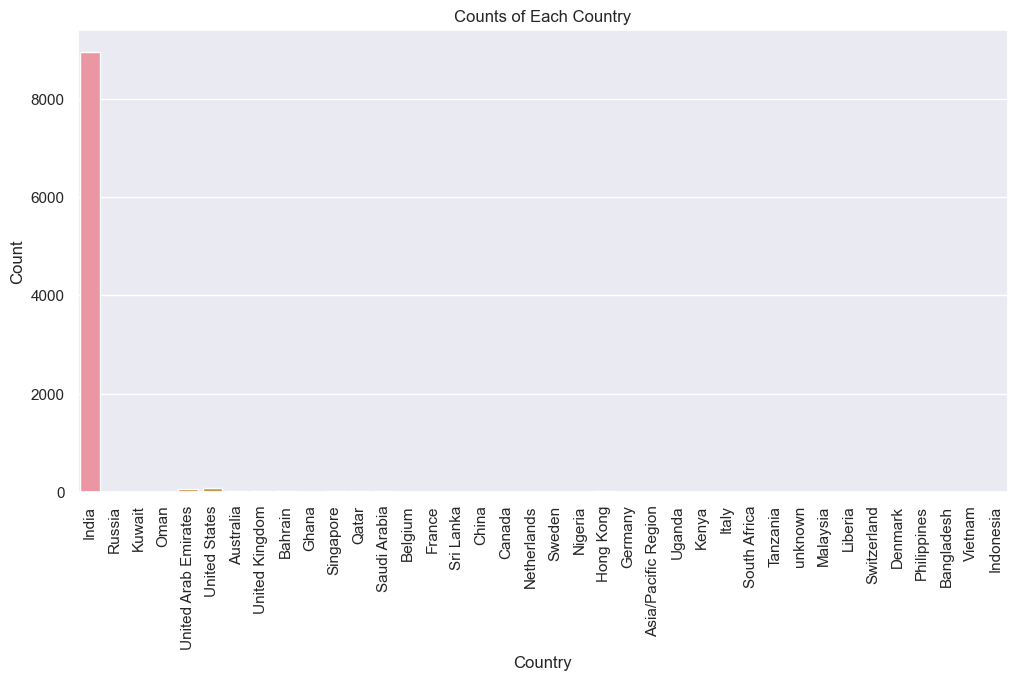

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="Country", data=data)
plt.title("Counts of Each Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

 We can infer from the above graph that most of the students enrolled are from India 

### Univariate Analysis of City

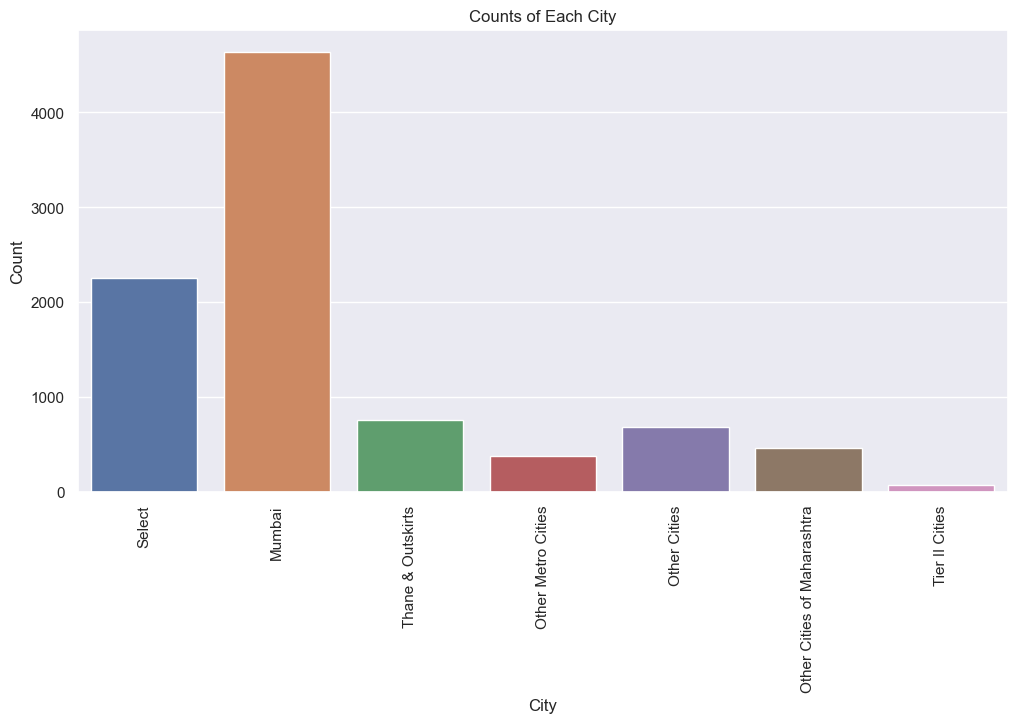

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="City", data=data)
plt.title("Counts of Each City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

We can infer from the above graph that most of the students are from Mumbai

### Univariate Analysis of Specialization And Conversion

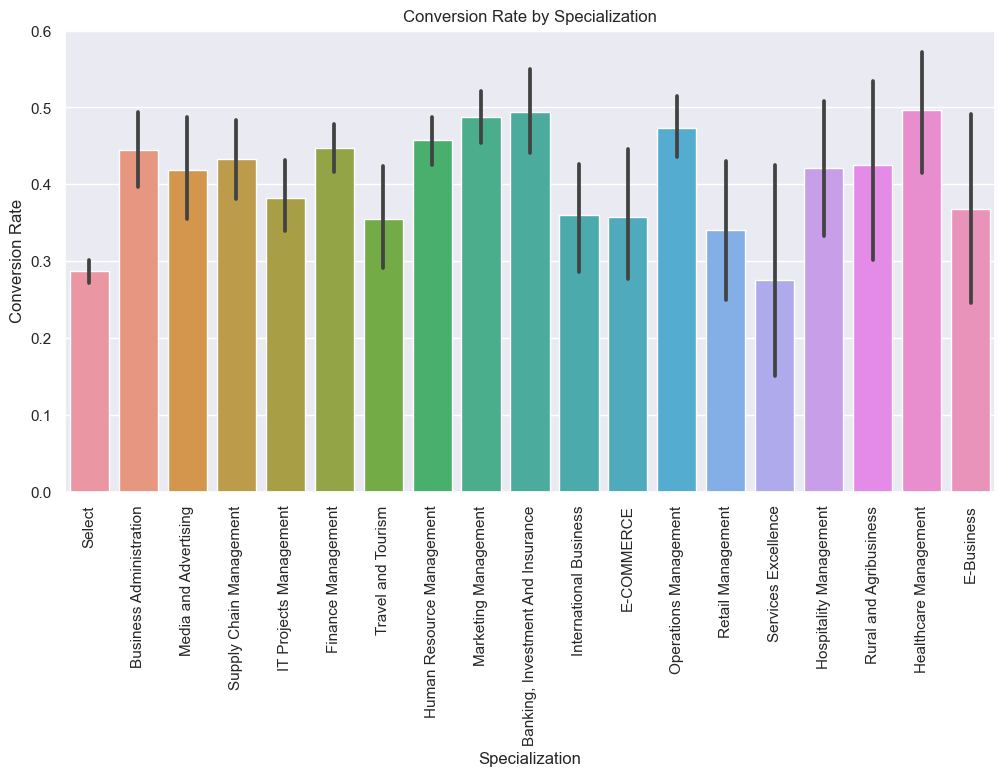

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Specialization", y="Converted", data=data)
plt.title("Conversion Rate by Specialization")
plt.xlabel("Specialization")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer from the above bivariate analysis that conversion is high in the management related courses 

### Univariate Analysis of Occupation vs Conversion

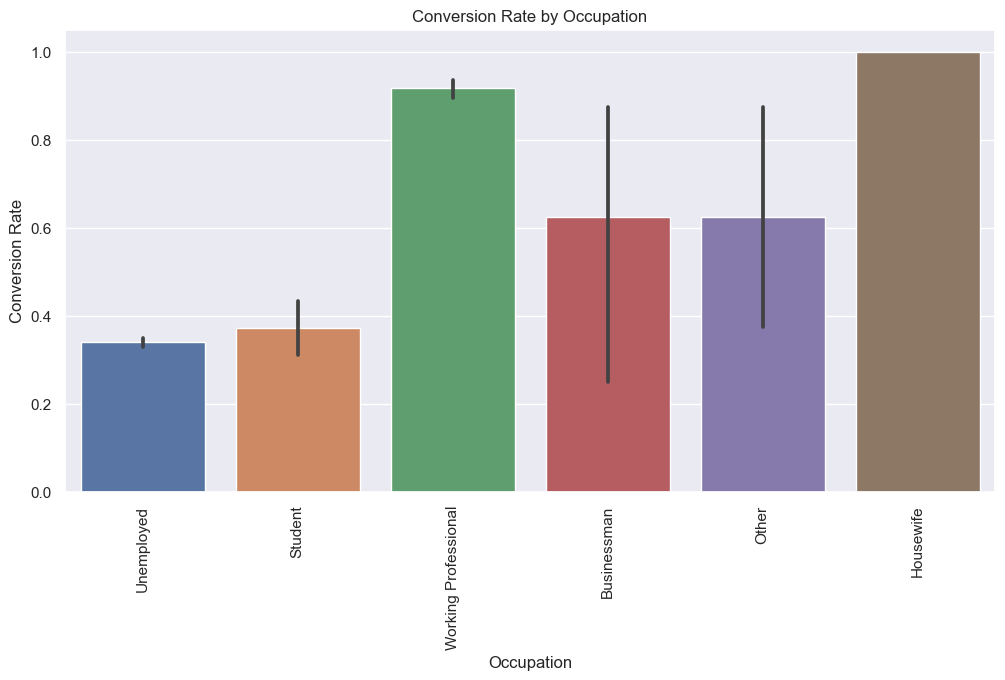

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x="What is your current occupation", y="Converted", data=data)
plt.title("Conversion Rate by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer from the graph that
- Conversion rate for working professional is high
- Conversion rate for Housewife is high

### Bivariate Analysis of Lead Source and Conversion

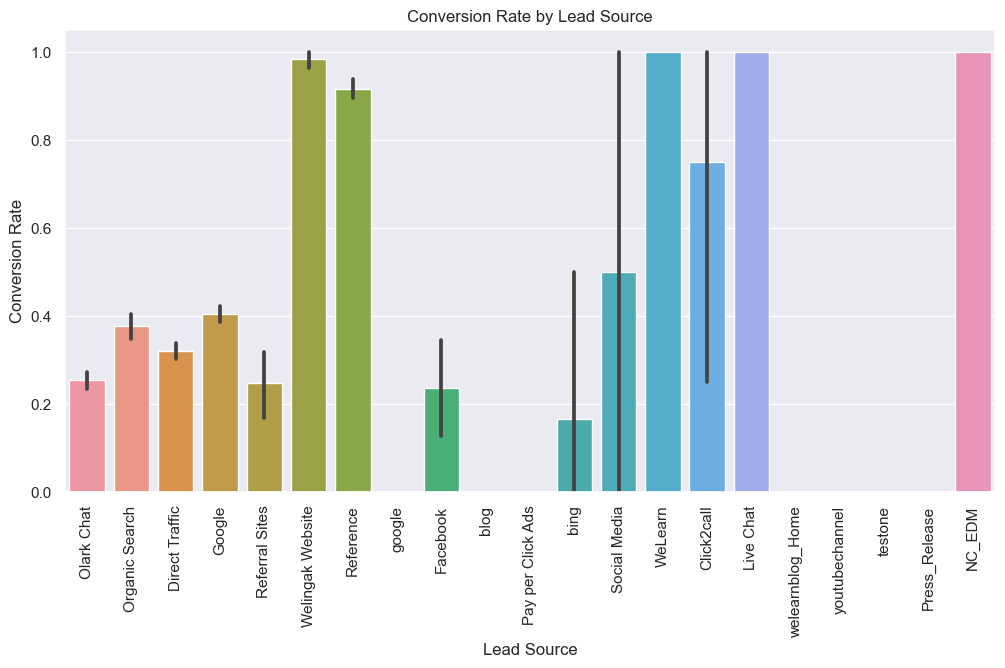

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Lead Source", y="Converted", data=data)
plt.title("Conversion Rate by Lead Source")
plt.xlabel("Lead Source")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer from theabove graph the folowing are good sources for getting students
Welingak Website,Reference,Welearn,Click2call,LiveChat

#### Bivariate Analysis of Enrollment Motivation Vs Conversion

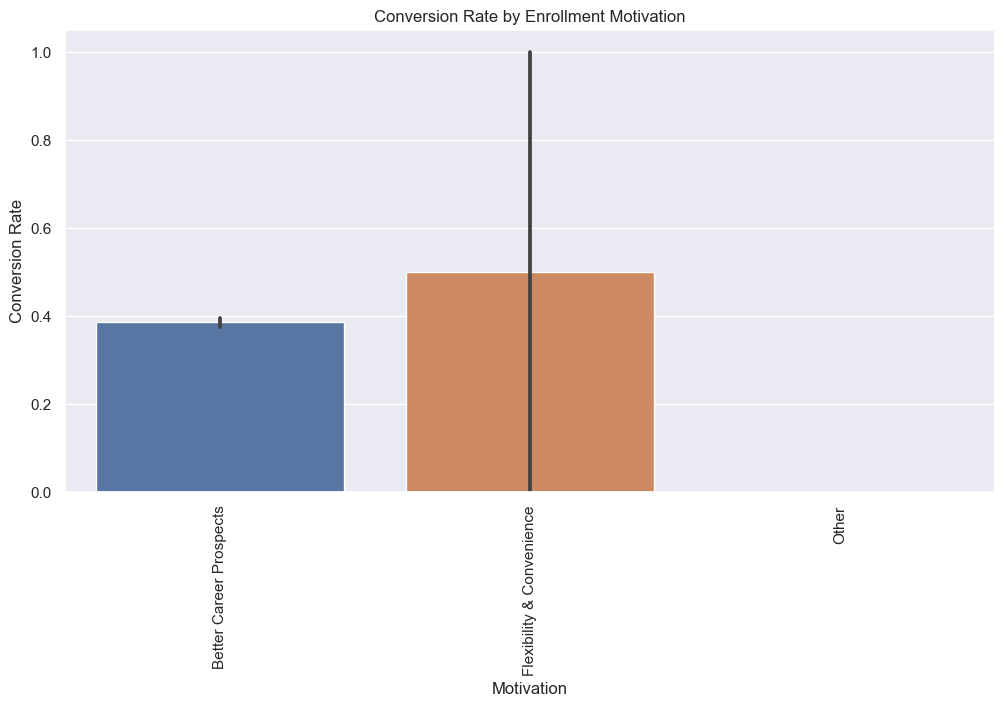

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x="What matters most to you in choosing a course", y="Converted", data=data)
plt.title("Conversion Rate by Enrollment Motivation")
plt.xlabel("Motivation")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer people who likes to study online and want better career opportunities are having high chance for enrollment

### Bivariate Analysis of Lead Origin Vs Conversion 

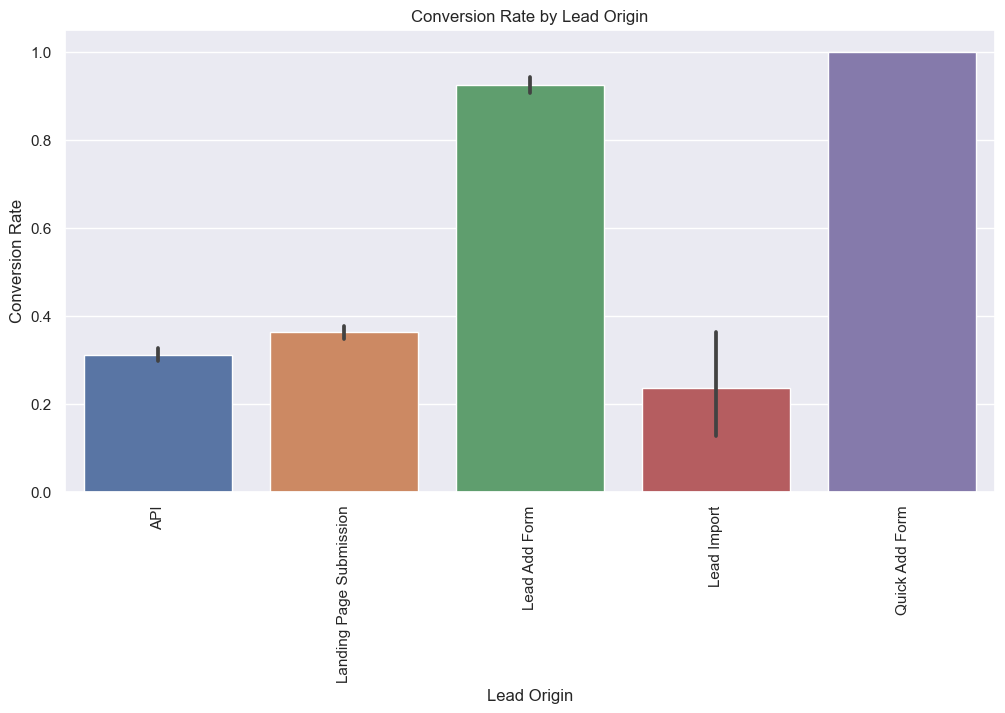

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Lead Origin", y="Converted", data=data)
plt.title("Conversion Rate by Lead Origin")
plt.xlabel("Lead Origin")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=90)
plt.show()

We can infer from graph the highest lead origin conversions are from forms which are lead add form and quick add form

### Non Categorical Coulnms 

### Univariate Analysis of Total Time spend on Website

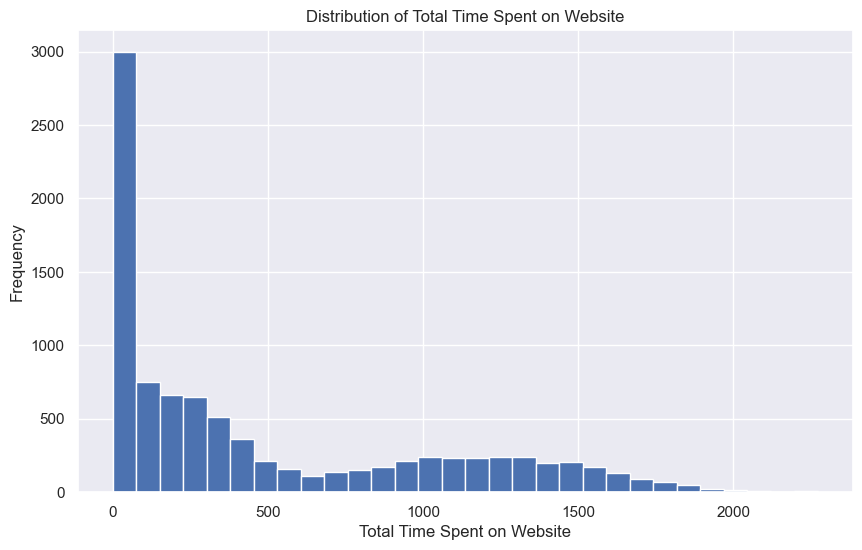

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(data["Total Time Spent on Website"], bins=30)
plt.title("Distribution of Total Time Spent on Website")
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Frequency")
plt.show()

### Univariate analysis Page Views per visit

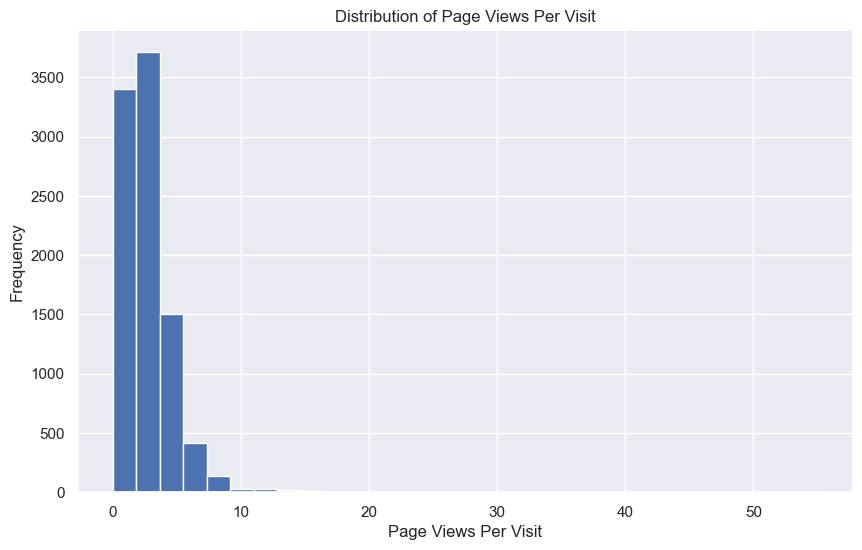

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(data["Page Views Per Visit"], bins=30)
plt.title("Distribution of Page Views Per Visit")
plt.xlabel("Page Views Per Visit")
plt.ylabel("Frequency")
plt.show()

### Univariate analysis Total Visits

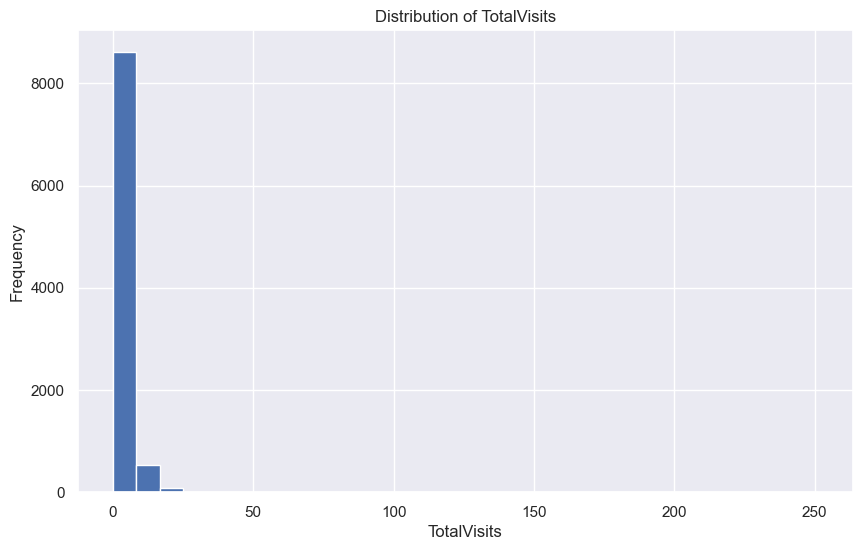

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(data["TotalVisits"], bins=30)
plt.title("Distribution of TotalVisits")
plt.xlabel("TotalVisits")
plt.ylabel("Frequency")
plt.show()

### Check correlation between Numerical variables

In [31]:
data.corrwith(data['Converted'])

Do Not Email                               -0.135580
Do Not Call                                 0.018581
Converted                                   1.000000
TotalVisits                                 0.029119
Total Time Spent on Website                 0.362483
Page Views Per Visit                       -0.005068
Search                                     -0.002261
Magazine                                         NaN
Newspaper Article                           0.003465
X Education Forums                         -0.008238
Newspaper                                  -0.008238
Digital Advertisement                      -0.005789
Through Recommendations                     0.018607
Receive More Updates About Our Courses           NaN
Update me on Supply Chain Content                NaN
Get updates on DM Content                        NaN
I agree to pay the amount through cheque         NaN
A free copy of Mastering The Interview     -0.039820
dtype: float64

In [32]:
"""Dropping the columns Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, 
    Get updates on DM Content and I agree to pay the amount through cheque since they are all 0's"""
data.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content'
          ,'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,...,0,0,0,0,0,Interested in other courses,Select,Select,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,Ringing,Select,Select,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,Will revert after reading the email,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,0,0,Ringing,Select,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,0,0,Will revert after reading the email,Select,Mumbai,0,Modified


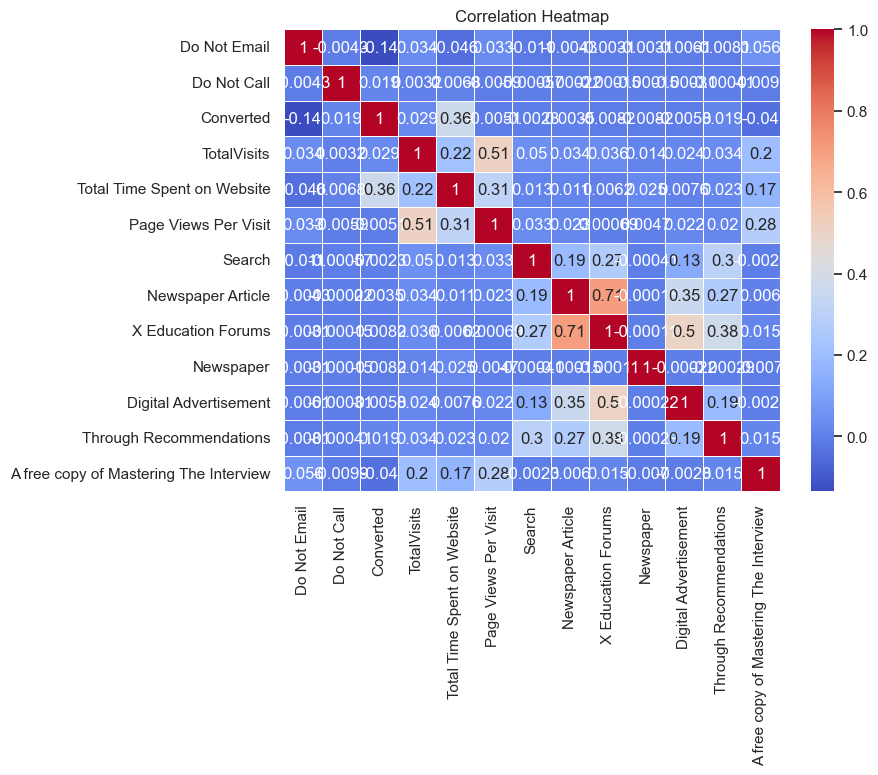

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
data.corrwith(data['Converted'])

Do Not Email                             -0.135580
Do Not Call                               0.018581
Converted                                 1.000000
TotalVisits                               0.029119
Total Time Spent on Website               0.362483
Page Views Per Visit                     -0.005068
Search                                   -0.002261
Newspaper Article                         0.003465
X Education Forums                       -0.008238
Newspaper                                -0.008238
Digital Advertisement                    -0.005789
Through Recommendations                   0.018607
A free copy of Mastering The Interview   -0.039820
dtype: float64

##### There is only a slight correlation between Total Visits and Page Views per visits but its not too strong correlation 
Also, the Target variable is highely correlated with Total Time Spent on Website

In [35]:
data.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                       int64
Do Not Call                                        int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                             int64
Newspaper Article                                  int64
X Education Forums                                 int64
Newspaper                      

#### Select the categorical columns

In [36]:
categorical_cols = data.select_dtypes(include=['object']).columns

#### Convert categorical variables into dummy variables

In [37]:

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [38]:
data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
pd.set_option('display.max_rows', 500)
data.dtypes

Do Not Email                                                                 int64
Do Not Call                                                                  int64
Converted                                                                    int64
TotalVisits                                                                float64
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                       float64
Search                                                                       int64
Newspaper Article                                                            int64
X Education Forums                                                           int64
Newspaper                                                                    int64
Digital Advertisement                                                        int64
Through Recommendations                                                      int64
A fr

In [40]:
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(data.corr(),annot = True)
#plt.show()

In [41]:
data.corrwith(data['Converted'])

Do Not Email                                                              -0.135580
Do Not Call                                                                0.018581
Converted                                                                  1.000000
TotalVisits                                                                0.029119
Total Time Spent on Website                                                0.362483
Page Views Per Visit                                                      -0.005068
Search                                                                    -0.002261
Newspaper Article                                                          0.003465
X Education Forums                                                        -0.008238
Newspaper                                                                 -0.008238
Digital Advertisement                                                     -0.005789
Through Recommendations                                                    0

In [42]:
#Excluding the variables on low correlation
cor_matrix = data.corrwith(data['Converted']).abs()
cor_matrix
to_drop=cor_matrix.loc[lambda x : x < 0.008].index.tolist()
to_drop

['Page Views Per Visit',
 'Search',
 'Newspaper Article',
 'Digital Advertisement',
 'Lead Source_Organic Search',
 'Lead Source_Social Media',
 'Country_Bangladesh',
 'Country_France',
 'Country_Germany',
 'Country_Netherlands',
 'Country_Oman',
 'Country_Singapore',
 'Country_South Africa',
 'Country_Sweden',
 'Country_United Arab Emirates',
 'Country_United Kingdom',
 'Specialization_E-Business',
 'Specialization_E-COMMERCE',
 'Specialization_IT Projects Management',
 'Specialization_International Business',
 'Specialization_Rural and Agribusiness',
 'How did you hear about X Education_Multiple Sources',
 'How did you hear about X Education_Other',
 'How did you hear about X Education_Social Media',
 'What is your current occupation_Student',
 'What matters most to you in choosing a course_Flexibility & Convenience',
 'Tags_Shall take in the next coming month',
 'Tags_Want to take admission but has financial problems',
 'Lead Profile_Other Leads']

In [43]:
data.drop(to_drop,axis=1,inplace=True)
data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,X Education Forums,Newspaper,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [44]:
data.corrwith(data['Converted'])

Do Not Email                                               -0.135580
Do Not Call                                                 0.018581
Converted                                                   1.000000
TotalVisits                                                 0.029119
Total Time Spent on Website                                 0.362483
X Education Forums                                         -0.008238
Newspaper                                                  -0.008238
Through Recommendations                                     0.018607
A free copy of Mastering The Interview                     -0.039820
Lead Origin_Landing Page Submission                        -0.051236
Lead Origin_Lead Add Form                                   0.321702
Lead Origin_Lead Import                                    -0.023695
Lead Origin_Quick Add Form                                  0.013138
Lead Source_Direct Traffic                                 -0.080682
Lead Source_Facebook              

#### Split the dataset into features (X) and target variable (y)

In [45]:
X = data.drop('Converted', axis=1)
y = data['Converted']

#### Split the data into training and testing sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Perform feature scaling

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Build and train the logistic regression model

In [48]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [49]:
rfe = RFE(model, n_features_to_select=15)  # Specifying  the number of features to select as 15
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)

In [50]:
# Print the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Specialization_Select',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_wrong number given',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [51]:
# Select columns selected by RFE
X_train_sm = X_train[selected_features]

In [52]:
# Add constant to the feature matrix
X_train_sm = sm.add_constant(X_train_sm)

In [53]:
# Fit the logistic regression model using statsmodels
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

In [54]:
# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Specialization_Select',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_wrong number given',
       'Lead Profile_Select', 'Lead Profile_Student of SomeSchool',
       'City_Select', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [55]:
# Print the model summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1436.8
Date:                Sun, 21 May 2023   Deviance:                       2873.5
Time:                        09:05:43   Pearson chi2:                 1.83e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5884
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [56]:
#Dropping Tags_wrong number given column since its p value is very high
X_train_sm.drop('Tags_wrong number given',1,inplace=True)
X_train_sm.columns

C:\Users\hp\AppData\Local\Temp\ipykernel_28520\928483073.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_sm.drop('Tags_wrong number given',1,inplace=True)


Index(['const', 'Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Specialization_Select',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [57]:
# Fit the logistic regression model using statsmodels
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
# Print the model summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1438.8
Date:                Sun, 21 May 2023   Deviance:                       2877.5
Time:                        09:05:43   Pearson chi2:                 1.87e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5882
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [58]:
#Dropping Lead Source_Welingak Website column since its p value is very high
X_train_sm.drop('Lead Source_Welingak Website',1,inplace=True)
X_train_sm.columns

C:\Users\hp\AppData\Local\Temp\ipykernel_28520\2287547941.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_sm.drop('Lead Source_Welingak Website',1,inplace=True)


Index(['const', 'Total Time Spent on Website',
       'Last Activity_Olark Chat Conversation', 'Specialization_Select',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [59]:
# Fit the logistic regression model using statsmodels
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
# Print the model summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1467.4
Date:                Sun, 21 May 2023   Deviance:                       2934.8
Time:                        09:05:44   Pearson chi2:                 1.96e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5845
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif = pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

# Print the VIF dataframe
print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
                                      Features        VIF
0                                        const  19.467459
1                  Total Time Spent on Website   1.145257
2        Last Activity_Olark Chat Conversation   1.287799
3                        Specialization_Select   1.937941
4   What is your current occupation_Unemployed   1.208558
5                                    Tags_Busy   1.056268
6                      Tags_Closed by Horizzon   1.156547
7                            Tags_Lost to EINS   1.063909
8     Tags_Will revert after reading the email   1.361469
9                          Lead Profile_Select   1.303499
10          Lead Profile_Student of SomeSchool   1.178713
11                                 City_Select   1.567712
12              Last Notable Activity_Modified   1.341501
13              Last Notable Activity_SMS Sent   1.291746


In [62]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4715    0.078051
7132    0.938149
8954    0.223308
5283    0.002403
3003    0.444873
478     0.016040
1352    0.924252
3166    0.927391
7700    0.001095
2647    0.000836
dtype: float64

In [63]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.80511929e-02, 9.38148825e-01, 2.23307545e-01, 2.40293900e-03,
       4.44873202e-01, 1.60396964e-02, 9.24252229e-01, 9.27390520e-01,
       1.09543981e-03, 8.35719592e-04])

In [64]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadNumber']=y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber
0,0,0.078051,4715
1,1,0.938149,7132
2,0,0.223308,8954
3,0,0.002403,5283
4,0,0.444873,3003


In [65]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadNumber,Predicted
0,0,0.078051,4715,0
1,1,0.938149,7132,1
2,0,0.223308,8954,0
3,0,0.002403,5283,0
4,0,0.444873,3003,0


In [66]:
# Creating confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3744,  240],
       [ 290, 2194]], dtype=int64)

In [67]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9180581323438466

In [68]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [69]:
# Calculating the sensitivity
TP/(TP+FN)

0.8832528180354268

In [70]:
# Calculating the specificity
TN/(TN+FP)

0.9397590361445783

In [71]:
selected_features_new=selected_features.drop(['Tags_wrong number given','Lead Source_Welingak Website'])
selected_features_new

Index(['Total Time Spent on Website', 'Last Activity_Olark Chat Conversation',
       'Specialization_Select', 'What is your current occupation_Unemployed',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Lead Profile_Select',
       'Lead Profile_Student of SomeSchool', 'City_Select',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

### Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

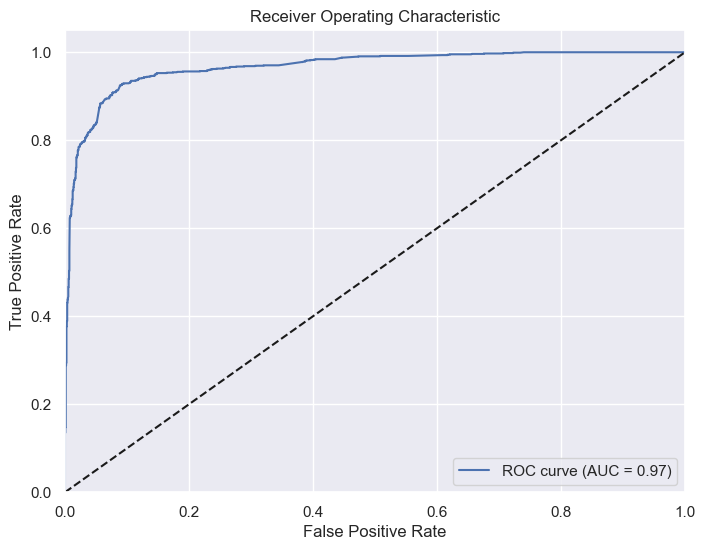

AUC: 0.9665223238373829


In [72]:
from sklearn.metrics import roc_curve, auc

# Fit the logistic regression model on the test set
X_test_sm = sm.add_constant(X_test[selected_features_new])
y_pred_prob = res.predict(X_test_sm)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print("AUC:", roc_auc)


In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Set the probability cutoffs
cutoffs = [0.2, 0.4, 0.6, 0.8]

# Initialize lists to store the evaluation metrics
accuracy = []
sensitivity = []
specificity = []

# Loop through each cutoff
for cutoff in cutoffs:
    # Apply the cutoff to classify the predictions
    predicted = [1 if prob >= cutoff else 0 for prob in y_pred_prob]
    
    # Calculate the evaluation metrics
    tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    
    # Append the metrics to the lists
    accuracy.append(acc)
    sensitivity.append(sens)
    specificity.append(spec)

# Create the evaluation metrics dataframe
metrics_df = pd.DataFrame({
    'Cutoff': cutoffs,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': specificity
})

# Print the dataframe
print(metrics_df)


   Cutoff  Accuracy  Sensitivity  Specificity
0     0.2  0.889250     0.952646     0.848968
1     0.4  0.915945     0.909006     0.920354
2     0.6  0.905483     0.820799     0.959292
3     0.8  0.883838     0.728877     0.982301


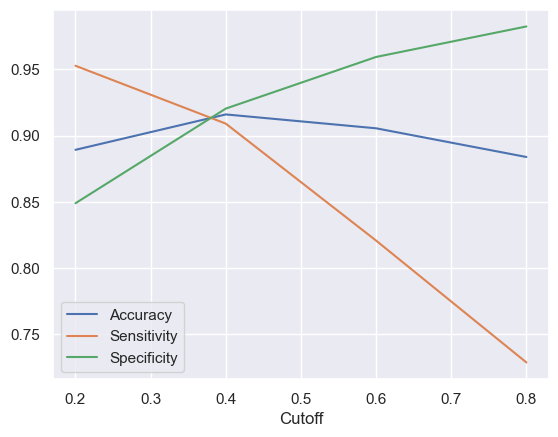

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
metrics_df.plot.line(x='Cutoff', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

##### Precision
TP / TP + FP

In [75]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9013968775677896

##### Recall
TP / TP + FN

In [76]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8832528180354268

#### Evaluate the model

In [77]:
train_accuracy = model.score(X_train_scaled, y_train)
test_accuracy = model.score(X_test_scaled, y_test)
print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)


Training Accuracy: 0.9279529993815708
Testing Accuracy: 0.9256854256854257
